In [1]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mp
import statistics as st
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
#drop all rows with inconsistent/no data in: parallax, color indices, g_mag, temperature, and metallicity
sample = pd.read_csv('newSgr2400-result.csv')

#recalculate temperature
sample['eff_temp'] = 4600 * (1 / (0.92 * sample['bp_rp'] + 1.7) + 1 / (0.92 * sample['bp_rp'] + 0.62))

#drop rows with empty temp after this
sample.dropna(subset = ['eff_temp'], inplace=True)

#drop rows with empty g_mag

sample.dropna(subset = ['phot_g_mean_mag'], inplace=True)

#drop rows with empty color indices
sample.dropna(subset = ['bp_g'], inplace=True)
sample.dropna(subset = ['g_rp'], inplace=True)
sample.dropna(subset = ['bp_rp'], inplace=True)

#drop rows with no metallicity
sample.dropna(subset = ['mh_gspphot'], inplace=True)

#drop rows with sketchy or no parallax
sampledrop = sample[sample['parallax'] < 0].index
sample.drop(sampledrop, inplace=True)
sample.dropna(subset = ['parallax'], inplace=True)

sample.dropna(subset = ['logg_gspphot'], inplace = True)

Text(0, 0.5, 'Frequency')

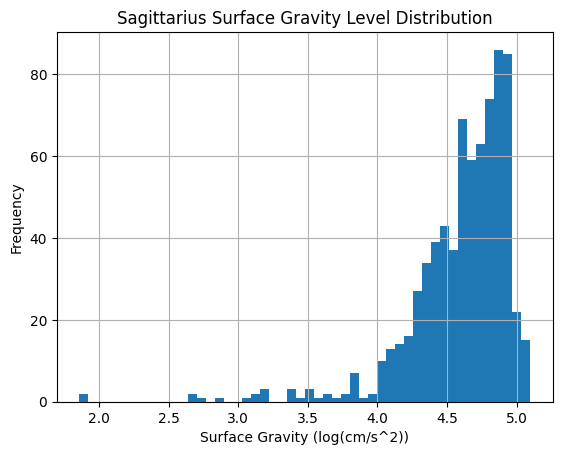

In [41]:
sample.hist(column = 'logg_gspphot', bins = 50)
plt.title('Sagittarius Surface Gravity Level Distribution')
plt.xlabel('Surface Gravity (log(cm/s^2))')
plt.ylabel('Frequency')

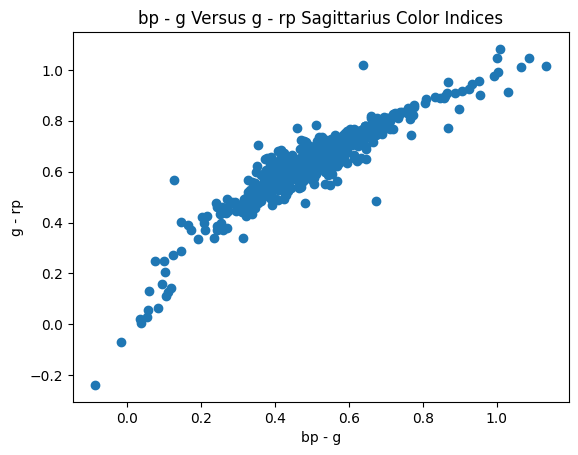

In [4]:
sample['bp - g'] = sample['bp_g'].astype('float')
sample['g - rp'] = sample['g_rp'].astype('float')
plt.scatter(sample['bp - g'], sample['g - rp'])
plt.title('bp - g Versus g - rp Sagittarius Color Indices')
plt.xlabel('bp - g')
plt.ylabel('g - rp')
plt.show()

Text(0, 0.5, 'Frequency')

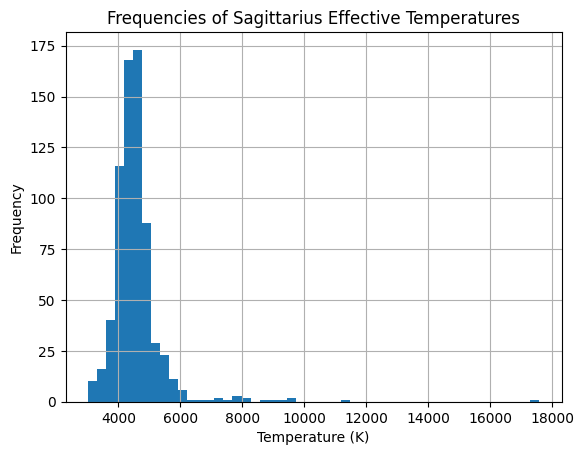

In [5]:
sample.hist(column = 'eff_temp', bins = 50)
plt.title('Frequencies of Sagittarius Effective Temperatures')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')

In [6]:
sample['pc_distance'] = 1 / (sample['parallax']/1000)
sample['pc_distance']

1       11812.705899
4        6372.232085
6        8716.504748
18       3162.064315
24      10162.143068
            ...     
2375     2046.814619
2380     4188.031875
2387    43472.991223
2392     6901.009501
2399    14047.045832
Name: pc_distance, Length: 698, dtype: float64

Text(0, 0.5, 'Frequency')

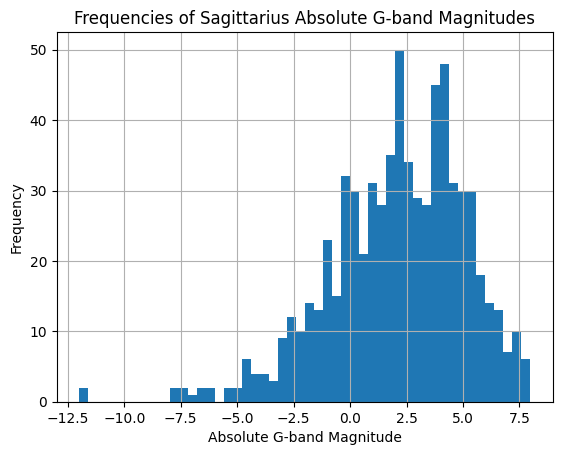

In [7]:
sample['abs_g_mag'] = sample['phot_g_mean_mag'] - 5 * np.log10(sample['pc_distance']) + 5
sample.hist(column = 'abs_g_mag', bins = 50)
plt.title('Frequencies of Sagittarius Absolute G-band Magnitudes')
plt.xlabel('Absolute G-band Magnitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

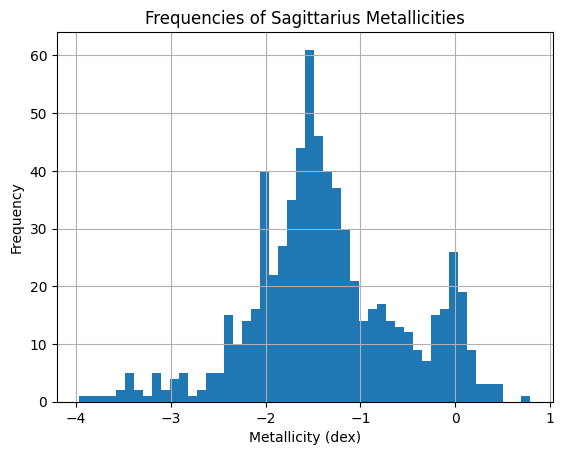

In [8]:
sample.hist(column='mh_gspphot', bins=50)
plt.title('Frequencies of Sagittarius Metallicities')
plt.xlabel('Metallicity (dex)')
plt.ylabel('Frequency')

Text(0.5, 0.92, 'Temperature vs. G-band Magnitude vs. Metallicity')

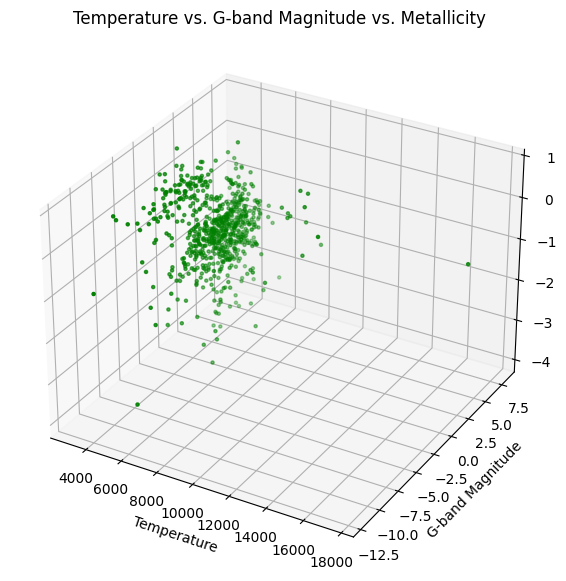

In [9]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter(sample['eff_temp'], sample['abs_g_mag'], sample['mh_gspphot'], color = 'green', marker='.')
plt.xlabel('Temperature')
plt.ylabel('G-band Magnitude')
plt.title('Temperature vs. G-band Magnitude vs. Metallicity')

In [10]:
savedSag = sample
df = pd.read_csv('HyadesClusterMetal-result.csv')

In [11]:
#drop all rows with inconsistent/no data in: parallax, color indices, g_mag, temperature, and metallicity
sample = df

#recalculate temperature
sample['eff_temp'] = 4600 * (1 / (0.92 * sample['bp_rp'] + 1.7) + 1 / (0.92 * sample['bp_rp'] + 0.62))

#drop rows with empty temp after this
sampledrop = sample[sample['eff_temp'] == None].index
sample.drop(sampledrop, inplace=True)

#drop rows with empty g_mag
sampledrop = sample[sample['phot_g_mean_mag'] == None].index
sample.drop(sampledrop, inplace=True)

#drop rows with empty color indices
sampledrop = sample[sample['bp_g'] == None].index
sample.drop(sampledrop, inplace=True)
sampledrop = sample[sample['bp_rp'] == None].index
sample.drop(sampledrop, inplace=True)
sampledrop = sample[sample['g_rp'] == None].index
sample.drop(sampledrop, inplace=True)

#drop rows with no metallicity
sampledrop = sample[sample['mh_gspphot'] == None].index
sample.drop(sampledrop, inplace=True)

#drop rows with sketchy or no parallax
sampledrop = sample[sample['parallax'] < 0].index
sample.drop(sampledrop, inplace=True)
sampledrop = sample[sample['parallax'] == None].index
sample.drop(sampledrop, inplace=True)
sample.dropna(subset = ['parallax'], inplace=True)

sample.dropna(subset = ['logg_gspphot'], inplace = True)

sample['parallax']

4       0.280542
6       0.016189
9       4.123433
10      0.398386
16      1.334761
          ...   
1974    0.021667
1981    0.182256
1987    0.509822
1989    1.772921
1995    0.470260
Name: parallax, Length: 741, dtype: float64

In [ ]:
sample.hist(column = 'logg_gspphot', bins = 50)
plt.title('Hyades Surface Gravity Level Distribution')
plt.xlabel('Surface Gravity (log(cm/s^2))')
plt.ylabel('Frequency')

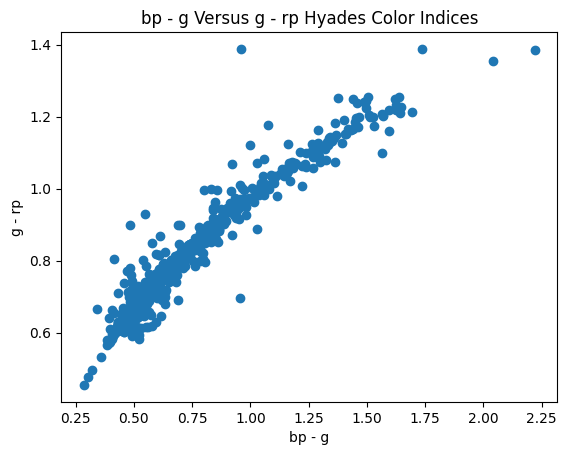

In [12]:
sample['bp - g'] = sample['bp_g'].astype('float')
sample['g - rp'] = sample['g_rp'].astype('float')
plt.scatter(sample['bp - g'], sample['g - rp'])
plt.title('bp - g Versus g - rp Hyades Color Indices')
plt.xlabel('bp - g')
plt.ylabel('g - rp')
plt.show()

Text(0, 0.5, 'Frequency')

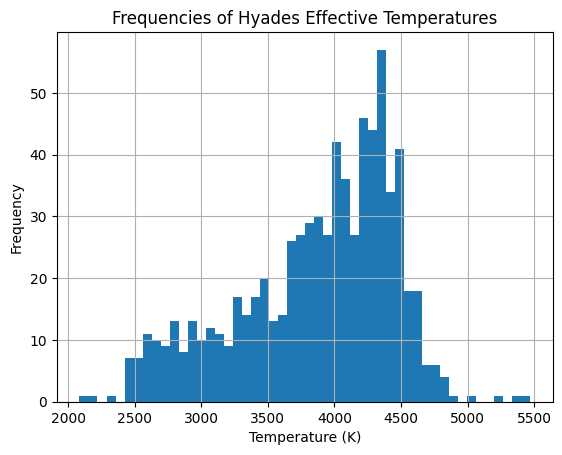

In [13]:
sample.hist(column = 'eff_temp', bins = 50)
plt.title('Frequencies of Hyades Effective Temperatures')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')

In [14]:
sample['pc_distance'] = 1 / (sample['parallax']/1000)
sample['pc_distance']

4        3564.528336
6       61769.448278
9         242.516388
10       2510.125590
16        749.197891
            ...     
1974    46152.681377
1981     5486.776861
1987     1961.470536
1989      564.040789
1995     2126.485410
Name: pc_distance, Length: 741, dtype: float64

(17.02355760368492, 17.249514195235456)


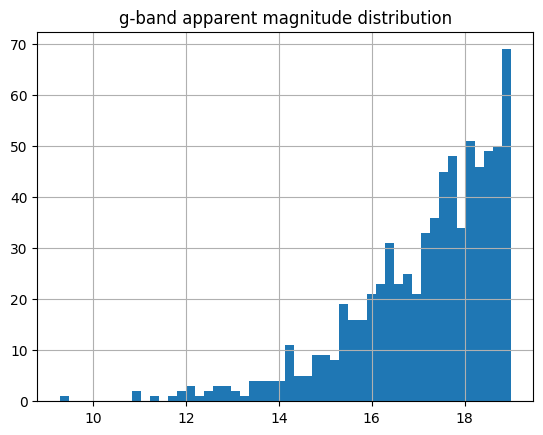

In [15]:
sample.hist(column = 'phot_g_mean_mag', bins = 50)
plt.title('g-band apparent magnitude distribution')
x = df['bp_g'].std()
col = sample['phot_g_mean_mag']
#mag_search_range = (col.median() - iqr(col), col.median() + iqr(col))
#print(mag_search_range)
std_error = col.std() / math.sqrt(len(col))
t_value = 1.961322772
#IMPORTANT - estimated interval of the true mean with 95% confidence
estimated_true_interval = (col.mean() - t_value * std_error, col.mean() + t_value * std_error)
print(estimated_true_interval)

Text(0, 0.5, 'Frequency')

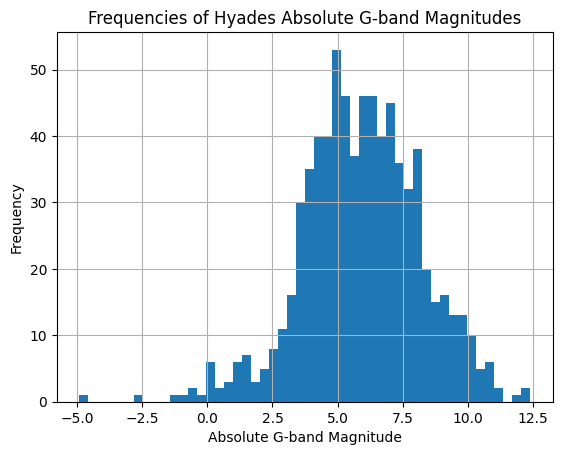

In [16]:
sample['abs_g_mag'] = sample['phot_g_mean_mag'] - 5 * np.log10(sample['pc_distance']) + 5
sample.hist(column = 'abs_g_mag', bins = 50)
plt.title('Frequencies of Hyades Absolute G-band Magnitudes')
plt.xlabel('Absolute G-band Magnitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

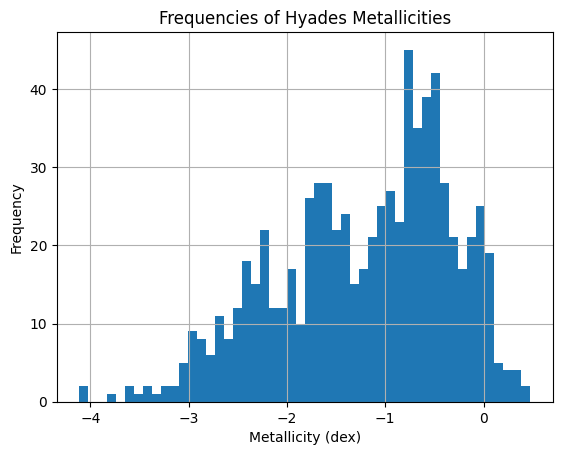

In [17]:
sample.hist(column='mh_gspphot', bins=50)
plt.title('Frequencies of Hyades Metallicities')
plt.xlabel('Metallicity (dex)')
plt.ylabel('Frequency')

Text(0.5, 0.92, 'Temperature vs. G-band Magnitude vs. Metallicity')

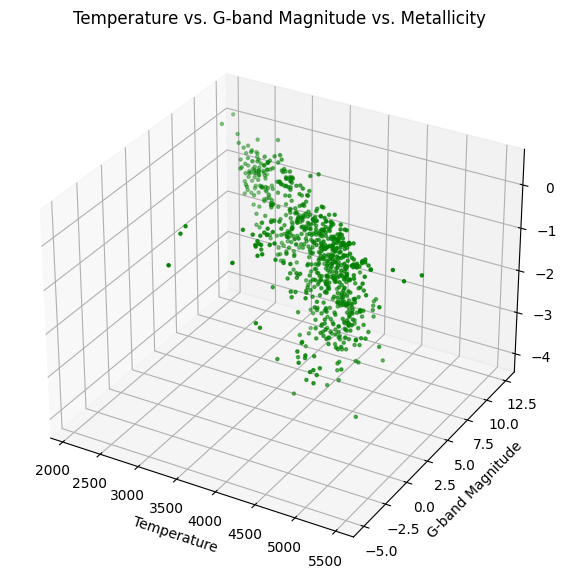

In [18]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(sample['eff_temp'], sample['abs_g_mag'], sample['mh_gspphot'], color = 'green', marker='.')
plt.xlabel('Temperature')
plt.ylabel('G-band Magnitude')
plt.title('Temperature vs. G-band Magnitude vs. Metallicity')

Text(0.5, 0.92, 'Sagittarius Sample Properties')

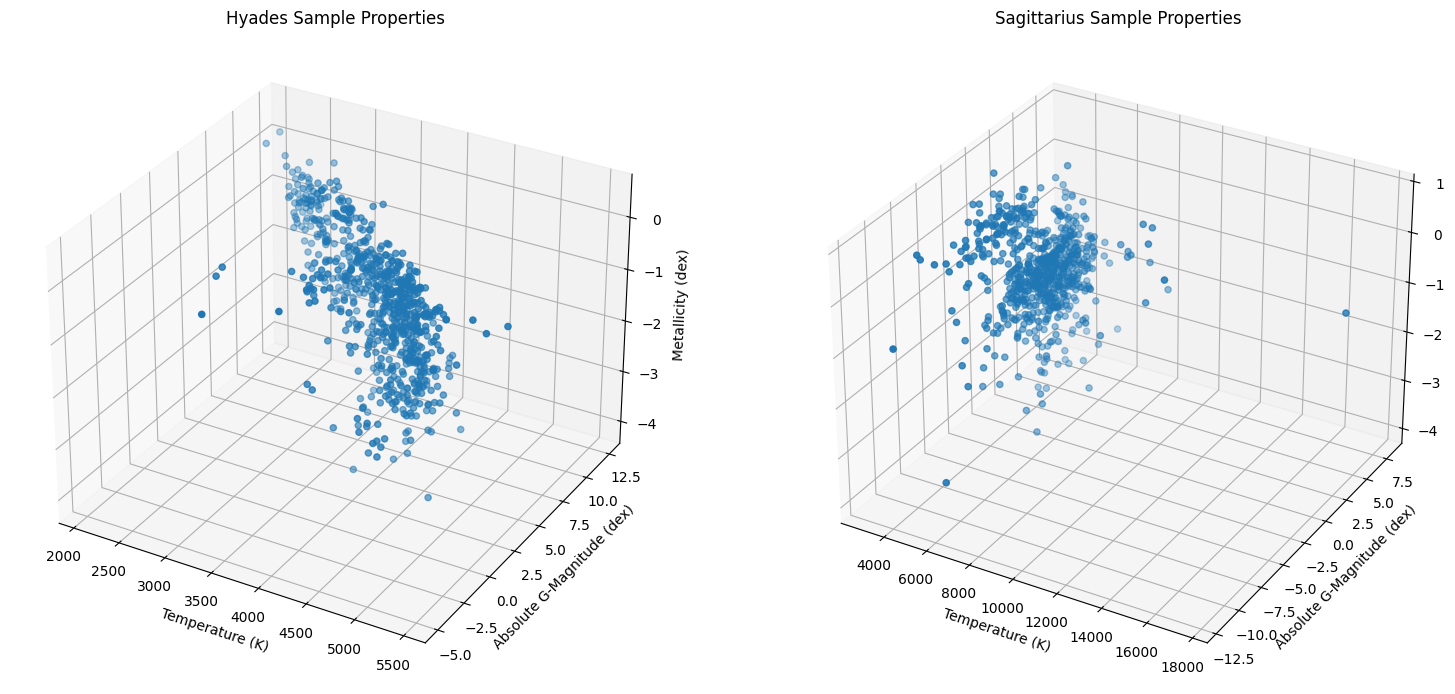

In [66]:
# 2 subplots

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax2 = fig.add_subplot(121, projection='3d')
ax2.scatter(sample['eff_temp'], sample['abs_g_mag'], sample['mh_gspphot'])
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Absolute G-Magnitude (dex)')
ax2.set_zlabel('Metallicity (dex)')
ax2.set_title('Hyades Sample Properties')

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(savedSag['eff_temp'], savedSag['abs_g_mag'], savedSag['mh_gspphot'])
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Absolute G-Magnitude (dex)')
ax1.set_zlabel('Metallicity (dex)')
ax1.set_title('Sagittarius Sample Properties')



In [59]:
#figure this out :/

'''plt.figure(figsize=(16, 8.4))
plt.title('Map of the Sgr Stream')
plt.scatter(savedSag['ra'], savedSag['dec'])
plt.grid(True)
plt.show()

#define colors
colors = {'O': '#0307fc', 'B': '#5380fc', 'A': '#afe6fa', 'F': '#8eedaf', 'G': '#e4ed8e', 'K': '#fab743', 'M': '#fa2511'}
spectypes = {}


#assign colors
w = []
letter_codes = []
for i in range(len(savedSag)):
    temp = df['SpType'].to_numpy()[i][0]
    if temp in colors:
        w.append(colors[temp])
        letter_codes.append(temp)
    else:
        w.append('#000000')
        letter_codes.append('X')
savedSag['Color'] = w'''

"plt.figure(figsize=(16, 8.4))\nplt.title('Map of the Sgr Stream')\nplt.scatter(savedSag['ra'], savedSag['dec'])\nplt.grid(True)\nplt.show()\n\n#define colors\ncolors = {'O': '#0307fc', 'B': '#5380fc', 'A': '#afe6fa', 'F': '#8eedaf', 'G': '#e4ed8e', 'K': '#fab743', 'M': '#fa2511'}\nspectypes = {}\n\n\n#assign colors\nw = []\nletter_codes = []\nfor i in range(len(savedSag)):\n    temp = df['SpType'].to_numpy()[i][0]\n    if temp in colors:\n        w.append(colors[temp])\n        letter_codes.append(temp)\n    else:\n        w.append('#000000')\n        letter_codes.append('X')\nsavedSag['Color'] = w"

In [30]:
#double histogram of absolute g magnitudes
x0 = np.array(savedSag['abs_g_mag'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(sample['abs_g_mag'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of Absolute G-Band Magnitudes', xaxis_title='G-Band Magnitude', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)

fig.show()

In [62]:
#double histogram of effective temperature
x0 = np.array(savedSag[savedSag['eff_temp'] <= 8000]['eff_temp'])
x1 = np.array(sample['eff_temp'])
#x2 = np.array(sample[sample['teff_gspphot'] != None]['teff_gspphot'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))
#fig.add_trace(go.Histogram(x=x2, marker_color="#FFEEEE"))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of Effective Temperatures', xaxis_title='Effective Temperature (K)', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()
print(len(savedSag['eff_temp']))
print(len(sample['eff_temp']))

698
741


In [32]:
#double histogram of metallicity
x0 = np.array(savedSag['mh_gspphot'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(sample['mh_gspphot'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of Metallicities', xaxis_title='[Fe/H] Metallicity (dex)', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

In [33]:
#double histogram of surface gravity
x0 = np.array(savedSag['logg_gspphot'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(sample['logg_gspphot'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of Surface Gravity Levels', xaxis_title='Surface Gravity (log(cm/s^2))', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

In [35]:
#double histogram of bp - g
x0 = np.array(savedSag['bp_g'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(sample['bp_g'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of BP - G Color Indices', xaxis_title='BP - G Color Index', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

In [36]:
#double histogram of g - rp
x0 = np.array(savedSag['g_rp'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(sample['g_rp'])

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of G - RP Color Indices', xaxis_title='G - RP Color Index', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

In [26]:
print(len(savedSag['ra']))
print(len(sample['ra']))

698
741


In [58]:
savedSag.to_csv('cleanSgr.csv', index=False)
sample.to_csv('cleanHyades.csv', index=True)

In [59]:
newsample = sample
newsample.dropna(subset=['teff_gspphot'])
newSag = savedSag
newSag.dropna(subset=['teff_gspphot'])

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,pmde,gmag,b_r,col_ra_icrs,col_de_icrs,eff_temp,bp - g,g - rp,pc_distance,abs_g_mag
1,1636148068921376768,Gaia DR3 13400298143232,13400298143232,657489388,2016.0,45.098382,0.083408,0.257334,0.072536,0.084655,...,-1.713,17.186899,0.8256,45.098379,0.257341,5290.041630,0.328199,0.468699,11812.705899,1.809670
4,1636148068921376768,Gaia DR3 46660524732544,46660524732544,1567878517,2016.0,45.605709,0.126900,0.582321,0.133167,0.156931,...,-1.597,18.319201,1.2143,45.605708,0.582328,4379.953239,0.498709,0.665609,6372.232085,4.276201
6,1636148068921376768,Gaia DR3 60988535904000,60988535904000,292956911,2016.0,45.134892,0.158118,0.696097,0.138637,0.114725,...,-1.520,18.453400,1.1066,45.134891,0.696104,4395.750469,0.494078,0.662491,8716.504748,3.732669
18,1636148068921376768,Gaia DR3 165304701578752,165304701578752,1065581475,2016.0,45.508573,0.130928,0.937616,0.123627,0.316249,...,-2.068,18.407000,0.8976,45.508572,0.937625,5075.509203,0.368509,0.502472,3162.064315,5.889387
24,1636148068921376768,Gaia DR3 222101349137792,222101349137792,1746227238,2016.0,45.610824,0.137502,1.125055,0.128253,0.098404,...,-1.551,18.292000,1.2594,45.610822,1.125062,4241.066773,0.554525,0.680534,10162.143068,3.235968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,1636148068921376768,Gaia DR3 1157701223387605504,1157701223387605504,818641251,2016.0,222.954527,0.191948,4.028095,0.148890,0.488564,...,-0.506,18.896900,1.0515,222.954529,4.028097,4608.065796,0.479530,0.578291,2046.814619,7.315085
2380,1636148068921376768,Gaia DR3 1157771175519559808,1157771175519559808,1389069509,2016.0,221.944155,0.158600,3.717125,0.133449,0.238776,...,-0.904,18.534800,1.0976,221.944160,3.717129,4166.769182,0.574036,0.700897,4188.031875,5.399216
2387,1636148068921376768,Gaia DR3 1157890098869423104,1157890098869423104,823420595,2016.0,222.587103,0.136997,4.125932,0.137941,0.023003,...,-0.438,18.224199,1.0064,222.587106,4.125934,4855.629430,0.375381,0.578753,43472.991223,0.020446
2392,1636148068921376768,Gaia DR3 1157901055330620800,1157901055330620800,604682181,2016.0,222.409328,0.149305,4.122570,0.182010,0.144906,...,-0.385,18.422701,1.3207,222.409331,4.122572,4159.226440,0.581169,0.697895,6901.009501,4.204540


In [61]:
#double histogram of NEW effective temperature
#x0 = np.array(savedSag[savedSag['eff_temp'] <= 8000]['eff_temp'])
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.array(newsample[newsample['teff_gspphot'] <= 9000]['teff_gspphot'])
x2 = np.array(newSag['teff_gspphot'])

fig = go.Figure()
#fig.add_trace(go.Histogram(x=x0, marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=x1, marker_color='#F5DD42'))
fig.add_trace(go.Histogram(x=x2, marker_color="#FFCCCC"))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distributions of Effective Temperatures', xaxis_title='Effective Temperature (K)', yaxis_title='Frequency')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()
print(len(newSag['teff_gspphot']))
print(len(newsample['teff_gspphot']))

698
741


Text(0, 0.5, 'Declination (deg)')

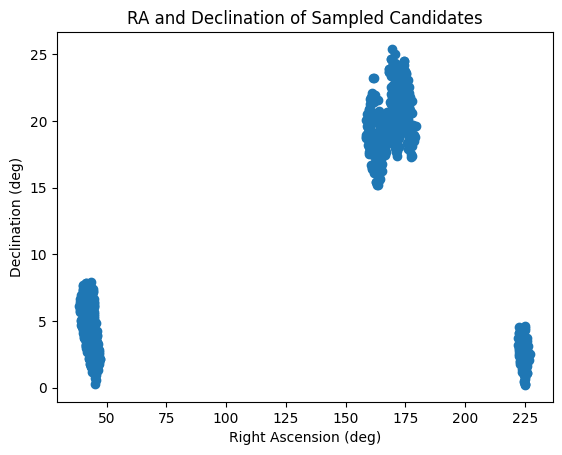

In [65]:
plt.scatter(savedSag['ra'], savedSag['dec'])
plt.title('RA and Declination of Sampled Candidates')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')